<a href="https://colab.research.google.com/github/ashanwithana/0a5de366-6a38-452c-a2aa-db7ba1fdabd6/blob/main/FinalTest_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Test

Load `salary_fix_en.csv` file.

Importing the libraries and reading the csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('salary_fix_en.csv')


In [4]:
numeric_cols = ['Stake', 'Staff Salary', 'Extra or Outstuff Salary', 'Hourly payment', 'Total']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

is_staff = df['Staff Salary'].notna()
is_outstaffed = df['Staff Salary'].isna()

assert not (is_staff & is_outstaffed).any()

File contains the data on University salaries:

|Поле|Содержание|
|:-|:-|
|`'RegNumber'`|Unique worker's ID
|`'Position'`|Workers position (possibly one of a few)
|`'Stake'`|Occupation, part-time ratio, giving an idea which part of 1 stake of fully employed week workload is performed by the worker (normally, between 0 an 1.5)
|`'Staff Salary'`|The salary paid for full-time workers
|`'Extra or Outstuff Salary'`|Extra payment for full-time worker or outstuffed worker salary
|`'Hourly Payment'`|Hourly payment (usually, extra)
|`'Total'`|Total salary. May contain some extra, non-salary payments

Worker is identified by unique ID. Some workers have a few records. This mean, they have part-time work within University.

Stuff workers MUST have staff salary. Outstuffed MUST NOT.

Stuff worker CAN have extra salary.

Analyze data with `Pandas` and `Pyplot`.

1. (1 point) Calculate Wage Fund (WF):

a) for University (`r1a`)

b) for each position (`r1b`)

c) University WF for Stuff workers only(`r1c`)

d) WF for Outstuffed workers only(`r1d`).

In [5]:
r1a = df['Total'].sum()
r1b = df.groupby('Position')['Total'].sum().round(2)
r1c = df[is_staff]['Total'].sum()
r1d = df[is_outstaffed]['Total'].sum()

print(f"University Wage Fund: {r1a:.2f}")
print("WF by Position:\n", r1b)
print(f"Staff WF: {r1c:.2f}")
print(f"Outstaffed WF: {r1d:.2f}")

University Wage Fund: 10679949.92
WF by Position:
 Position
Assistant              1034563.40
Associate Professor    5271273.01
Lecturer                452619.67
Professor              1440885.75
Senior Lecturer        2480608.09
Name: Total, dtype: float64
Staff WF: 9820882.83
Outstaffed WF: 859067.09


2. (1 point) Build a pichart for workers stakes by position


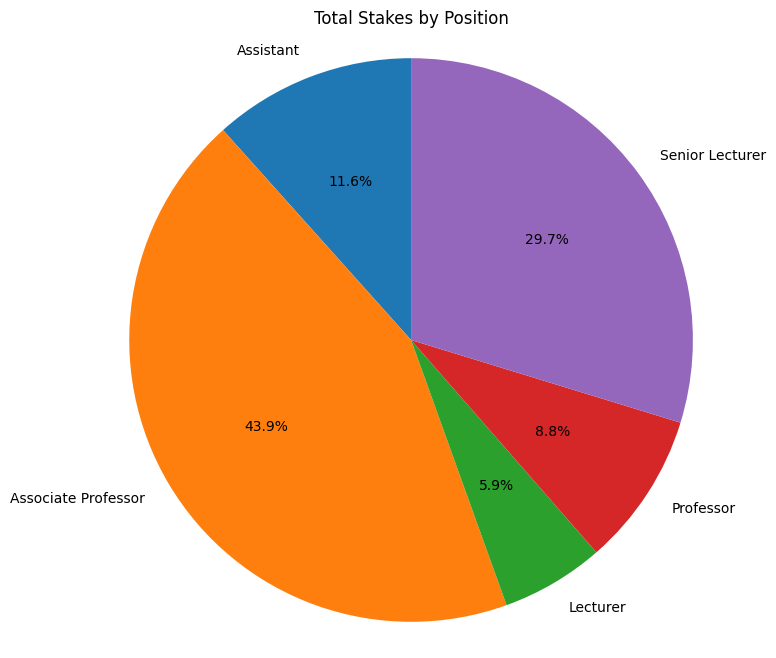

In [6]:
stakes_by_position = df.groupby('Position')['Stake'].sum().round(2)

plt.figure(figsize=(8, 8))
plt.pie(stakes_by_position, labels=stakes_by_position.index,
        autopct='%1.1f%%', startangle=90)
plt.title('Total Stakes by Position')
plt.axis('equal')
plt.show()

3. (1 point) Analyze assistants' salary and fin out:
    
- minimal (`r3a`)
- mean (`r3b`)
- maximal (`r3c`)

salaries for assisstants

In [7]:
assistants = df[df['Position'] == 'Assistant']

r3a = assistants['Total'].min()
r3b = assistants['Total'].mean()
r3c = assistants['Total'].max()

print(f"Min: {r3a:.2f}, Mean: {r3b:.2f}, Max: {r3c:.2f}")

Min: 1046.48, Mean: 7234.71, Max: 20019.50


4. (1 point) Analyze outstuffed associate professors. Build a table with their groupping by RegNumber, put into the table their stakes and salaries (DataFrame `r4a` with `columns=['Stakes', 'Total']`).

Count them – `r4b`.

In [8]:
staff_regs = df[df['Staff Salary'].notna()]['RegNumber'].unique()

outstaffed_assoc = df[
    (~df['RegNumber'].isin(staff_regs)) &
    (df['Position'] == 'Associate Professor')
]

r4a = outstaffed_assoc.groupby('RegNumber').agg(
    Stakes=('Stake', 'sum'),
    Total=('Total', 'sum')
).round(2).reset_index()

r4a = r4a.sort_values('RegNumber').reset_index(drop=True)

r4b = len(r4a)

print("\n4a - Pure outstaffed Associate Professors (grouped by RegNumber):")
print(f"Total count (r4b): {r4b} workers")
print("-" * 60)
print(r4a.to_string(index=False))
print("-" * 60)


4a - Pure outstaffed Associate Professors (grouped by RegNumber):
Total count (r4b): 35 workers
------------------------------------------------------------
 RegNumber  Stakes   Total
      1341    0.25 3634.65
      1469    0.50 6341.94
      2397    0.50 7185.73
      2652    0.50 7185.74
      2797    0.50 6841.68
      4232    0.50 6629.32
      4420    0.50 4709.16
      5196    0.30 4311.46
      5504    0.25 2993.24
      5601    0.25 7542.73
      9709    0.50 7269.28
      9931    0.25 3634.65
     70184    0.50 6763.04
     74235    0.50 6414.07
    100784    0.50 6763.04
    102413    0.50 7269.28
    104690    0.50 4688.76
    105337    0.50 6841.68
    106199    0.50 6841.68
    164665    0.50 4310.22
    173123    0.50 4634.87
    174266    0.30 4105.01
    300191    0.50 5986.47
    302429    0.50 5345.07
    302455    0.30 2406.91
    302514    0.50 7269.28
    302689    0.50 6841.68
    302832    0.50 8454.18
    302857    0.15 2180.79
    302873    0.40 5131.28
    3

5. (1 point) Analyze worker's salaries (including extra payments), working in University as a staff workers. Find out minimal (`r5a`), mean (`r5b`) and maximal salaries (`r5c`) for them.

In [9]:
staff_salaries = df[is_staff]['Total']

r5a = staff_salaries.min()
r5b = staff_salaries.mean()
r5c = staff_salaries.max()

print("\n5a - Min staff salary:", r5a)
print(f"5b - Mean staff salary: {r5b:.2f}")
print("5c - Max staff salary:", r5c)


5a - Min staff salary: 896.53
5b - Mean staff salary: 14316.16
5c - Max staff salary: 42974.95


6. (1 point) Analyze outstuffed workers occupation: find out minimal (`r6a`), mean (`r6b`) and maximal stake (`r6c`) for them.

In [10]:
outstaffed_stakes = df[is_outstaffed]['Stake']

r6a = outstaffed_stakes.min()
r6b = outstaffed_stakes.mean()
r6c = outstaffed_stakes.max()

print("\n6a - Min outstaffed stake:", r6a)
print(f"6b - Mean outstaffed stake:{r6b:.2f}")
print("6c - Max outstaffed stake:", r6c)


6a - Min outstaffed stake: 0.05
6b - Mean outstaffed stake:0.34
6c - Max outstaffed stake: 0.5


7. (1 point) Print Associate Professors RegNumbers, for those, who occupied at exactly 1.0 stake (`r7a`)

In [11]:
assoc = df[df['Position'] == 'Associate Professor']
stakes_sum = assoc.groupby('RegNumber')['Stake'].sum()
exact_1 = stakes_sum[stakes_sum == 1.0]

r7a = sorted(exact_1.index.tolist())
r7a_df = pd.DataFrame(r7a, columns=['RegNumber'])
r7a_df = r7a_df.sort_values('RegNumber').reset_index(drop=True)
print(r7a_df.to_string(index=False))

 RegNumber
       114
       540
       577
       585
      1204
      1504
      1595
      1616
      1651
      2012
      2257
      2263
      2293
      2328
      2383
      2403
      2454
      2774
      2937
      3027
      4544
      5230
      5703
     70766
     70812
     73454
     74326
     74332
     74763
    100364
    103087
    105887
    106038
    141369
    155716
    160830
    161208
    164775
    165021
    165283
    302474
    303567


8. (1 point) Find the most underloaded staff worker and print their RegNumbers and stakes (`r8a`).

In [12]:
staff_group = df[is_staff].groupby('RegNumber')
staff_stakes = staff_group['Stake'].sum()
min_stake = staff_stakes.min()  # 0.1

underloaded_workers = staff_stakes[staff_stakes == min_stake]
r8a = sorted(list(zip(underloaded_workers.index, underloaded_workers.values)))

underloaded_df = pd.DataFrame(r8a, columns=['RegNumber', 'Stake'])
underloaded_df = underloaded_df.sort_values('RegNumber').reset_index(drop=True)
print(underloaded_df.to_string(index=False))

 RegNumber  Stake
       583    0.1
      2018    0.1
      8593    0.1
     70032    0.1
    301469    0.1


9. (2 points) Build cummulative WF plots (from lesser salaries to bigger) for:

а) whole University;

б) Stuff workers;

в) Outstuffed personal.


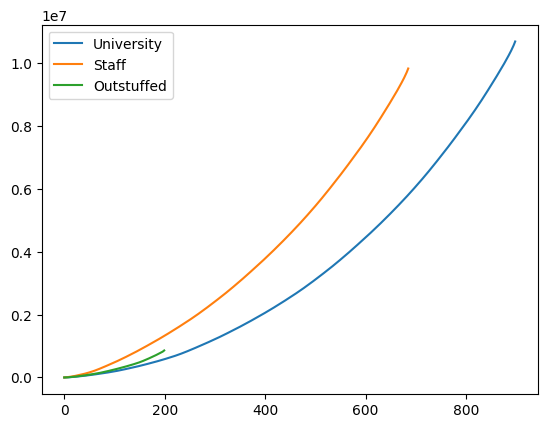

In [13]:
plt.plot(np.sort(df['Total']).cumsum(), label='University')
plt.plot(np.sort(df[df['Staff Salary'].notna()].groupby('RegNumber')['Total'].sum()).cumsum(), label='Staff')
plt.plot(np.sort(df[df['Staff Salary'].isna()].groupby('RegNumber')['Total'].sum()).cumsum(), label='Outstuffed')
plt.legend()
plt.show()